# Importance Sampling

## Objetivo

Dada una $p(x)$ queremos poder calcular $\mathbb{E}_p(f(X)) = \int f(x) p(x) dx$

Por ley de los grandes números, dada una muestra $x_1,..., x_n$ con distribución $p$, podemos aproximar la esperanza del siguiente modo:

$$\mathbb{E}_p(f(X)) \simeq \frac{1}{N}\sum_{i=1}^{N}f(x_i)$$


### Obstáculos

* Nuestra $p(x)$ es muy difícil de samplear
* El cálculo empírico tiene mucha varianza


### Solución

Para resolver esto observemos lo siguiente:

$$ \mathbb{E}_p(f(X)) = \int f(x) p(x) dx = \int \frac{f(x) p(x)}{q(x)} q(x) dx = \mathbb{E}_q( \frac{f(x) p(x)}{q(x)} )$$

$$≈ \frac{1}{N} \sum_{i=1}^N f(x_i) \frac{p(x_i)}{q(x_i)}
,$$

donde $x_i$ son sampleos a partir de $q$ y $\frac{p(x_i)}{q(x_i)}$ son los **pesos de importancia**.



Hay que elegir $q(x)$ de modo que la distribución asigne más importancia cuando $p(x)f(x)$ es alto, entonces podemos aproximar esa esperanza calculando la media empírica de $q$ en $\frac{f(x) p(x)}{q(x)}$. De este modo logramos dos cosas:

* Podemos calcular la esperanza a partir de una distribución $q(x)$ más sencilla de samplear.
* Podemos disminuir la varianza de nuestra estimación.

## Paso a Paso del método

 - **Elegir una distribucion propuesta $q(x)$**: Tiene que ser facil de muestrar y tiene que ser grande en zonas de nuestro interés.
 - **Calcular los $x_i$:** Generar $N$ muestras a partir de $q$.
 - **Aproximar $E[f]$:** Calcular $\frac{1}{N} \sum_{i=1}^N f(x_i) \frac{p(x_i)}{q(x_i)}$

# Ejercicio 1

a) Graficar la distribucion $p$ y la función $f$.  
b) Encontrar una $q$ adecuada para nuestro problema  
c) Calcular $E[f(x) \frac{p(x)}{q(x)}]$


In [47]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

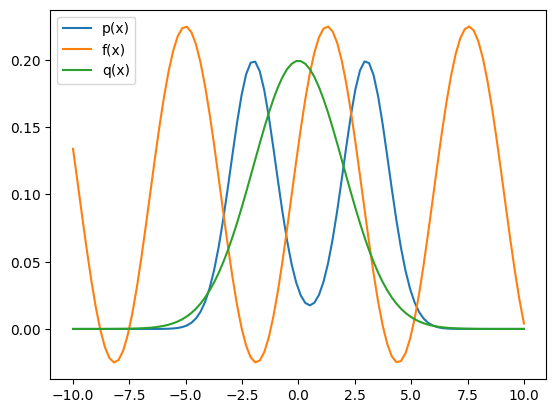

Esperanza: 0.05552371508161459


In [19]:
def p(x):
  a,b,c = -2,3,1
  term1 = 0.5 * (1 / np.sqrt(2 * np.pi * c**2)) * np.exp(- (x - a)**2 / (2 * c**2))
  term2 = 0.5 * (1 / np.sqrt(2 * np.pi * c**2)) * np.exp(- (x - b)**2 / (2 * c**2))
  return term1 + term2

def f(x):
  return np.sin(x+0.3)/8+0.1

def q(x):
  return stats.norm.pdf(x, 0, 2)

n = 10000

plt.plot(np.linspace(-10,10,100), p(np.linspace(-10,10,100)), label='p(x)')
plt.plot(np.linspace(-10,10,100), f(np.linspace(-10,10,100)), label='f(x)')
plt.plot(np.linspace(-10,10,100), q(np.linspace(-10,10,100)), label='q(x)')
plt.legend()
plt.show()

muestras = stats.norm.rvs(0, 2, n)
esperanza = 1/n * np.sum((p(muestras)/q(muestras)) * f(muestras))
print('Esperanza:', esperanza)

# Ejercicio 2

Ahora conocemos a $p(x)$ y sabemos que es una distribución bimodal.

Calculemos empíricamente $E_p(f(x))$, donde $f(x) = sin(x)$

Para esto tomar una muestra $X = {x_1, x_2, ..., x_N}$ de acuerdo a la distribución $p(x)$

Luego calculamos $\mathbb{E}_p(f(x)) \simeq \frac{1}{N} \sum_{i=1}^N f(x_i)$


Repetir este proceso R = 1000 veces y graficar la distribución de $\mathbb{E}_p(f(x))$

Calcular la varianza de $\mathbb{E}_p(f(x))$


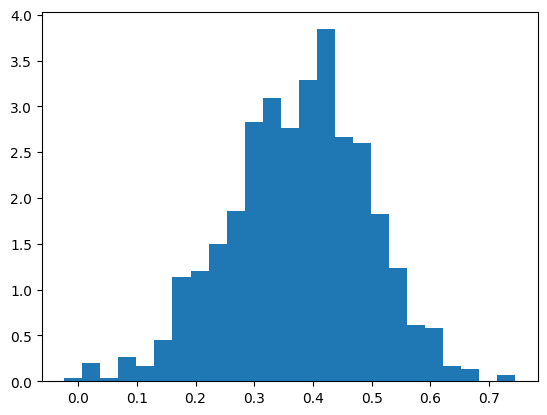

Varianza: 0.013967454198970072


In [29]:
#Completar
N = 20
R = 1000

E_p = []

for _ in range(R):
    muestras = stats.norm.rvs(-2, 1, N)*0.5 + stats.norm.rvs(3, 1, N)*0.5
    E_p.append(np.mean(np.sin(muestras)))

plt.hist(E_p, bins="auto", density=True)
plt.show()

varianza = np.var(E_p, ddof=1)
print('Varianza:', varianza)


Ahora vamos a calcular la media utilizando Importance Sampling.

Para esto proponer una $q(x)$ adecuada. Pueden graficar $p$ y $f$ para ayudarse en este paso.

Recordemos que

$\mathbb{E}_p(f(x)) = \mathbb{E}_q(\frac{f(x) p(x)}{q(x)}) \simeq \frac{1}{N} \sum_{i=1}^N \frac{f(x) p(x)}{q(x)}$

Repetir el procedimiento R veces y graficar la distribución.

¿Que observa?

¿En que modificó utilizar Importance Sampling?


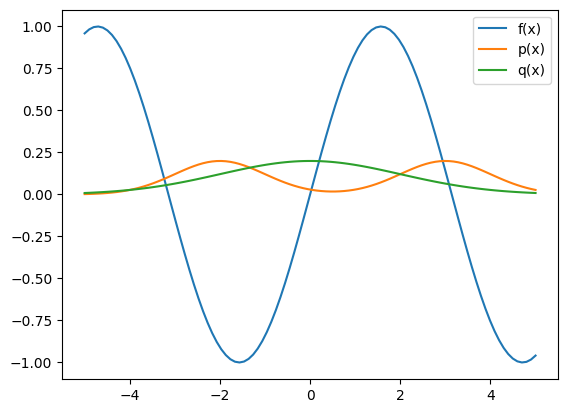

Esperanza: -0.24109034934594475


In [51]:
from scipy.stats import norm

def bimodal_distribution(x):
    mu1 = -2
    mu2 = 3
    sigma = 1

    y = 0.5 * (norm.pdf(x, mu1, sigma) + norm.pdf(x, mu2, sigma))
    return y

def f(x):
    return np.sin(x)

def q(x):
    return norm.pdf(x, 0, 2)

plt.plot(np.linspace(-5,5,100), f(np.linspace(-5,5,100)), label='f(x)')
plt.plot(np.linspace(-5,5,100), bimodal_distribution(np.linspace(-5,5,100)), label='p(x)')
plt.plot(np.linspace(-5,5,100), q(np.linspace(-5,5,100)), label='q(x)')
plt.legend()
plt.show()

n = 10000

muestras = stats.norm.rvs(0, 2, n)
esperanza = 1/n * np.sum((bimodal_distribution(muestras)/q(muestras)) * f(muestras))

print('Esperanza:', esperanza)


# Ejercicio 3

Replicar **ej 1** pero usando

* $$p \sim e(1)$$
* $$f(x): I_{x\geq4}(x)$$

Verifique que da lo esperado.

In [49]:
P = stats.expon(scale=1)

def f(x):
    if x >= 4:
        return 1
    return 0

esperanza_f = 0 * P.cdf(4) + 1 * (1 - P.cdf(4))
print('Esperanza:', esperanza_f)
# La esperanza es igual a la probabilidad de aceptacion de la indicadora

Esperanza: 0.01831563888873422
